In [2]:
# import all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
#Load the csv files into pandas dataframe
StudentsPerformance=pd.read_csv('/content/drive/My Drive/Colab Notebooks/StudentsPerformance_2.csv')
#Display the dataset
StudentsPerformance




,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [33]:
#Summary of the dataset
StudentsPerformance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There are 1000 rows and 8 features.


In [6]:
# Calculating the null values present in each column of the dataset
StudentsPerformance.isna().sum() # or StudentsPerformance.isnull().sum() 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No missing values are present in the dataset

**Qn.1 Find out How many females and males participated in the test**

In [7]:
StudentsPerformance['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

**Qn.2 What do you think about the student's parental level of education?**


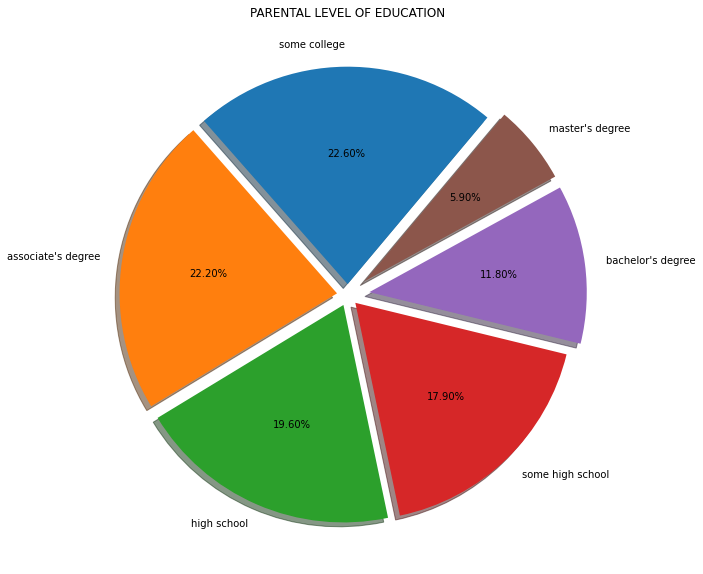

In [8]:
PLE=StudentsPerformance['parental level of education'].value_counts() 
PLE
plot = PLE.plot.pie(y='parental level of education', figsize=(10, 10),autopct='%1.2f%%',title='PARENTAL LEVEL OF EDUCATION',ylabel='',explode=(0.05, 0.05, 0.05,0.05,0.1,0.1),shadow=True, startangle=50)


Observing the pie chart 
> parents having master's degree are in the minority category (5.90%).11.80%  parents possess bachelor's degree. The percentage distribution for all other categories are also shown over here.

**Qn.3 Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course**

In [9]:
StudentsPerformance[['gender',
      'test preparation course',
      'math score',
      'writing score',
      'reading score']].groupby(['gender','test preparation course']).agg('mean').round(2)

math score  writing score  reading score
gender test preparation course                                          
female completed                     67.11          78.79          77.38
       none                          61.32          68.98          69.96
male   completed                     72.99          70.34          70.79
       none                          66.47          59.55          62.58



*   Male candidates who completed test preparation course scored highest in the maths score
*   Female candidates who completed test preparation course have highest writing and reading scores






**Qn.4 What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course**

In [10]:
N=StudentsPerformance[['gender',
      'test preparation course',
      'math score',
      'writing score',
      'reading score']].groupby(['gender','test preparation course']).std().round(2) 
N      

math score  writing score  reading score
gender test preparation course                                          
female completed                     14.43          12.24          12.70
       none                          16.51          15.02          14.64
male   completed                     14.04          12.89          13.61
       none                          14.34          13.47          13.60

Standard deviation summarizes the variability in the given dataset. A low standard deviation indicates that the values tend to be close to the mean of the dataset, while a high standard deviation indicates that the values are spread out over a wider range. 

From the analysis, male candidates who completed test preparation course (lowest standard daviation 14.04 for math score), female candidates completing test preparation course (lowest standard deviaiton for writing score) and female candidates completing tets prapration course(lowest standard devaiton 12.70) performed well.


**Qn.5 The management needs your help to give bonus points to the top 25% of
students based on their maths score, so how will you help the management
to achieve this**


Find the quartiles for the given dataset and fourth quartile will give top 25%. First the fourth quartile will be calculated which is 77 and next we should display values greater than or equal to 77 which will give top 25% of students basedon their math score

In [52]:
q75 = StudentsPerformance['math score'].quantile(q=0.75)
q75
Top_mathscore= StudentsPerformance[StudentsPerformance['math score'].ge(q75)]
Top_mathscore

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [54]:
Top_mathscore.to_csv('Topmathscore_25percent.csv') # For exporting the newly formed sheet for the management to analyse top 25%